In [14]:
import matplotlib.pyplot as plt 
#from numpy import *
import pynested_fit as pynf
import os
import glob

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

nested_fit = 'nested_fit'+pynf.__version__

nested_fit5.3.0


In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


In [3]:
# List available directories with results
directories = glob.glob('res_*') # Put here the keyword of the directories with the differen results
print(directories)

['res_2gauss_bg', 'res_3gauss_bg', 'res_1gauss_bg', 'res_4gauss_bg']


In [12]:
pynf.__version__

'5.3.0'

In [15]:
# Run the analyses in the different directories from python (see 'simple_analysis_visu.ipynb)
# or from the terminal
# The writing of configuration file for each directory can be very long 
# ecept for the case of very similar configuration files
for dir in directories:
        path = os.path.join(root_path,dir)
        os.chdir(path)
        os.system(nested_fit) # nested_fit is defined at the very beginning

| N. try:  1 | N. step:        100 | Min. loglike:   -1578.772490283765819 | Evidence:   -1584.858101754008885 | Ev. step:   -1585.894462735012439 | Ev. pres. acc.:  1.2429612E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1403.119071519422732 | Evidence:   -1410.389443397433070 | Ev. step:   -1410.914605534630255 | Ev. pres. acc.:  1.0683925E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1292.869704078821542 | Evidence:   -1300.522959502640560 | Ev. step:   -1301.099272759527139 | Ev. pres. acc.:  9.5842603E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1214.096988502743670 | Evidence:   -1220.834248541807710 | Ev. step:   -1221.521973188426045 | Ev. pres. acc.:  8.7863732E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        500 | Min. loglike:   -1129.948004993251516 | Evidence:   -1136.101040844481076 | Ev.

In [16]:
# Prepare to load the output results files
os.chdir(root_path)
summary = pynf.Summary()

# Name the labels from the directories names
labels = [dir.split('_')[1] for dir in directories] # This is user dependent
print(labels)

['2gauss', '3gauss', '1gauss', '4gauss']


In [17]:
# Fill the pandas dataframe
df = summary.add_simulations(directories,labels)
df = df.sort_index()

Loading directory  res_2gauss_bg
Current path =  res_2gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'val_1', 'val_2', 'val_3', 'val_4', 'val_5', 'val_6']
Analysis in res_2gauss_bg/
Loading directory  res_3gauss_bg
Current path =  res_3gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'val_1', 'val_2', 'val_3', 'val_4', 'val_5', 'val_6', 'val_7', 'val_8', 'val_9', 'val_10']
Analysis in res_3gauss_bg/
Loading directory  res_1gauss_bg
Current path =  res_1gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'val_1', 'val_2', 'val_3', 'val_4']
Analysis in res_1gauss_bg/
Loading directory  res_4gauss_bg
Current path =  res_4gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'val_1', 'val_2', 'val_3', 'val_4', 'val_5', 'val_6', 'val_7', 'val_8', 'val_9', 'val_10']
Analysis in res_4gauss_bg/
Parameters  found  ['b_g', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'A_3', 'A_4', 'x_3', 'x_4', 'A', 'x_0']

 #### Available input keys ###
clustering
convergence
data
data

In [18]:
# Print (part) of the data frame
# For each parameter, mean, standard deviation, median, max, and credible levels (plus and minus, 68%, 95% and 99%) are available
df[['evidence','evidence_err_est','complexity','mean_x_1','sd_x_1','max_x_1',
    'median_x_1','conf_level_m99_x_1','conf_level_p99_x_1']]

,evidence,evidence_err_est,complexity,mean_x_1,sd_x_1,max_x_1,median_x_1,conf_level_m99_x_1,conf_level_p99_x_1
labels,,,,,,,,,
1gauss,-338.354497,0.090329,3.931513,NaN,NaN,NaN,NaN,NaN,NaN
2gauss,-324.496817,0.116465,6.119469,437.401040,25.144737,464.335008,420.209420,402.063121,467.612642
3gauss,-326.324723,0.136914,10.335287,60.329941,61.544838,3.465395,42.735710,0.631183,248.626513
4gauss,-326.436837,0.136749,10.587784,59.788576,63.209153,5.093646,38.209775,0.375964,253.168221


Text(0, 0.5, 'Evidence (in log)')

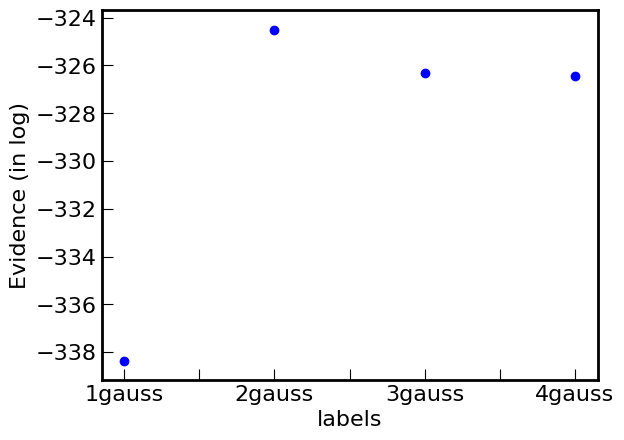

In [19]:
# Plot bayesian evidence values
df['evidence'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
plt.ylabel('Evidence (in log)')

Text(0, 0.5, 'Bayesian complexity')

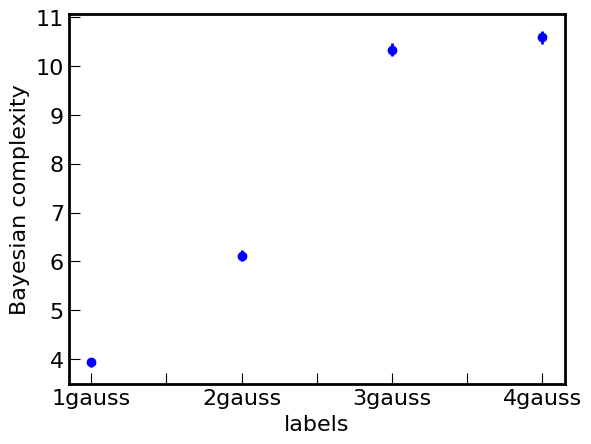

In [20]:
# Plot bayesian complexity values (effective supported parameters)
df['complexity'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
plt.ylabel('Bayesian complexity')

Text(0, 0.5, 'x01 parameter value')

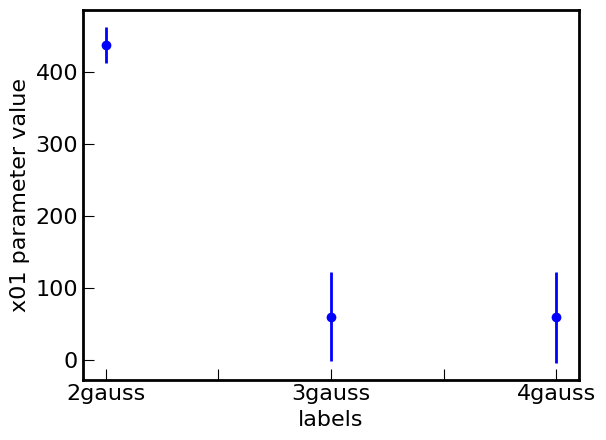

In [21]:
df['mean_x_1'].plot(yerr=df['sd_x_1'],fmt='ob',linestyle= 'None')
plt.ylabel('x01 parameter value')